# Переменные конфигурации


In [ ]:
DATASET_PATHES = ["drive/MyDrive/Potholes Dataset/Dataset 1 (Simplex)/",
                "drive/MyDrive/Potholes Dataset/Dataset 2 (Complex)/",
                "drive/MyDrive/Potholes Dataset/Subset 1 (Simplex)/",
                "drive/MyDrive/Potholes Dataset/Subset 2 (Complex)/"]

# Вспомогательные функции для генерации датасета


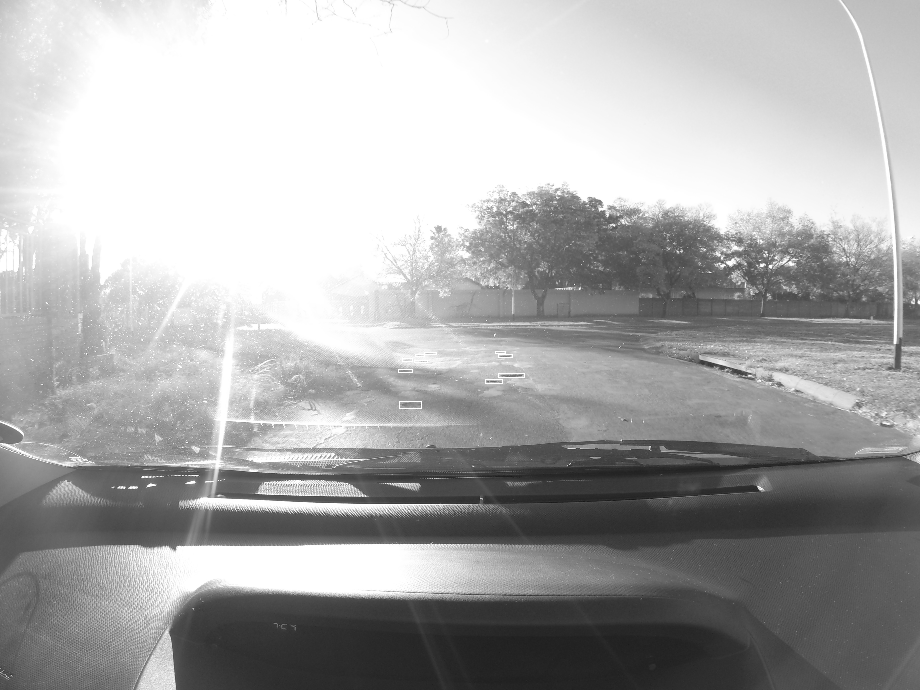

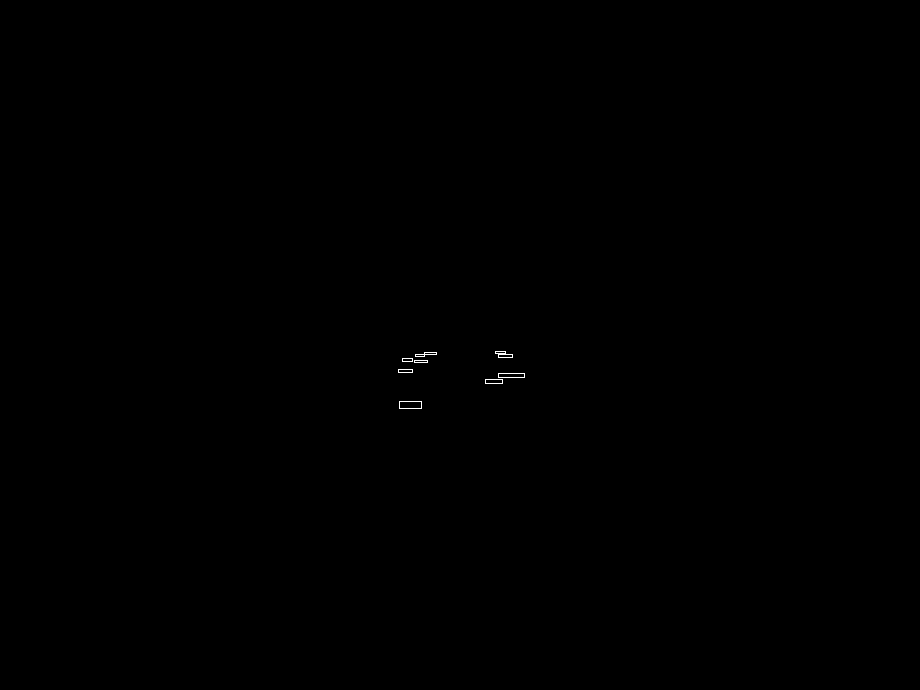

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from skimage.transform import resize
import numpy as np

def normalize(img_path):
  img = cv2.imread(img_path)
  height, width = img.shape[:2]
  # серый фильтр
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # уменьшаем разрешение
  downscale = cv2.resize(gray, (width//4, height//4))
  return downscale

def generate_pair(prepath="", line=[]):
  # получаем полный путь
  full_path = prepath
  for i in line:
    if i.isnumeric():
      break
    full_path += i + " "

  full_path = full_path[:-1]
  full_path = full_path.replace("\\", "/").replace(".bmp", ".JPG")

  # нормализируем изображение
  img = normalize(full_path)
  height, width = img.shape[:2]

  # рисуем битовую маску
  bit_mask = np.zeros((height, width))
  
  # узнаем, с какого символа начать парсинг файла
  i = 0
  while not line[i].isnumeric():
    i += 1
  i += 1

  # рисуем прямоугольники из файла
  while i < len(line):
    cv2.rectangle(bit_mask, (int(line[i])//4, int(line[i+1])//4), 
                 (int(line[i])//4+int(line[i+2])//4, int(line[i+1])//4+int(line[i+3])//4), (255, 255, 255), 1)
    i += 4

  return (img, bit_mask)

# Сбор датасета

In [ ]:
from glob import glob
import os
import numpy as np

train_dataset = []

for path in DATASET_PATHES:
  # собираем тренировочные данные
  with open(path + "simpleTrainFullPhotosSortedFullAnnotations.txt") as file:
    line = file.readline().split()
    while line:
      # генерируем пары
      train_dataset.append(generate_pair(line=line,
                                         prepath=path))
      line = file.readline().split()
  
  # собираем негативные тренировочные данные
  os.chdir(path + "Train data/Negative data/") 
  for filename in glob('*.JPG'):
    img = cv2.imread(filename)
    height, width = img.shape[:2]
    mask = np.zeros((height, width))
    train_dataset.append((img, mask))
